In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy

from modules import get_bandpass_dict, get_eff_wavelen, Sed, \
                    create_training_sets, train_templates

In [3]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

In [4]:
bandpass_dict = get_bandpass_dict()

In [5]:
with open('data/training_catalog.pkl', 'rb') as input:
    galaxies = pickle.load(input)

## N6

In [5]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 6
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N6_"+str(i+1)] = template

In [6]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.04, verbose=True)

Round 1
N6_1:   71.8   50.5   45.0   43.0   42.0  
N6_2:  108.6   76.2   71.8   69.9  
N6_3:  140.3   91.6   88.5  
N6_4:  369.1  244.4  235.2  
N6_5:  677.8  405.5  383.7  375.6  
N6_6: 1583.7  946.4  925.4  
Round 2
N6_1:   39.3   36.9   36.4  
N6_2:   63.2   54.3   53.6  
N6_3:   57.9   51.5   51.0  
N6_4:  102.3   90.3   89.3  
N6_5:  211.0  193.5  191.7  
N6_6:  891.3  
Round 3
N6_1:   36.4  
N6_2:   61.0   53.6   53.1  
N6_3:   52.7  
N6_4:   78.2   73.4   72.9  
N6_5:  165.2  159.8  
N6_6:  828.7  739.9  725.8  
Round 4
N6_1:   35.9  
N6_2:   58.8   54.4   54.0  
N6_3:   55.7   47.7   47.4  
N6_4:   96.5   91.8   91.1  
N6_5:  234.6  231.4  
N6_6:  583.7  554.0  547.8  
Round 5
N6_1:   35.6  
N6_2:   63.7   58.8   58.5  
N6_3:   54.0   47.7   47.4  
N6_4:   84.0   81.0  
N6_5:  129.9  127.3  
N6_6:  791.1  775.5  
Round 6
N6_1:   35.2  
N6_2:   71.0   65.6   65.2  
N6_3:   63.4   56.9   56.5  
N6_4:   68.8   66.8  
N6_5:  124.0  
N6_6:  808.7  795.9  
Round 7
N6_1:   34.8  
N6_2

Number of fluxes in each training set:
[58373, 44950, 56241, 107238, 107978, 36948]


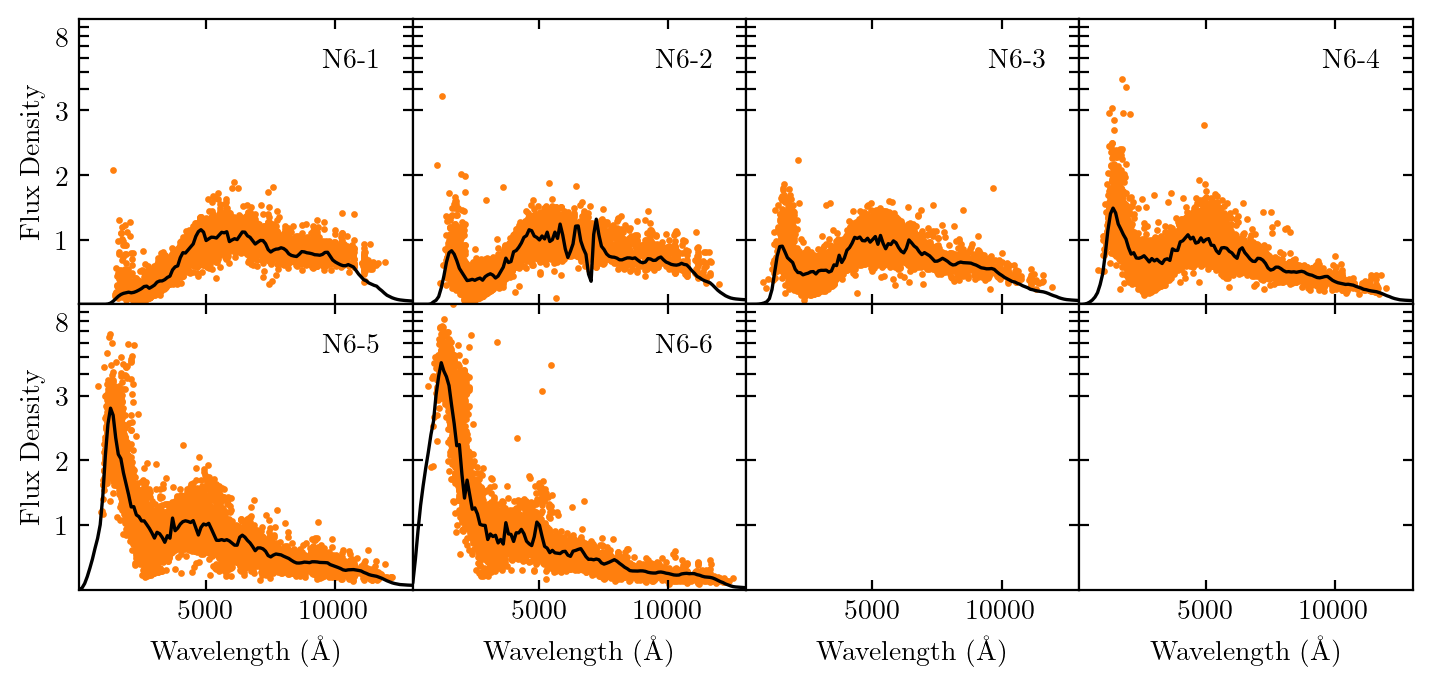

In [8]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 6:
        break
    
    wavelen = [row[0] for row in final_sets["N6_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N6_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N6_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N6-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [9]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N7

In [10]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 7
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)"_"+str(i+1)] = template

In [11]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.04, verbose=True)

Round 1
N6_1:   70.6   47.8   42.1   40.0   39.0  
N6_2:  101.8   71.7   67.2   65.4  
N6_3:  113.6   77.6   74.7  
N6_4:  236.5  152.9  148.4  
N6_5:  435.4  269.5  260.1  
N6_6:  746.3  449.4  426.2  418.0  
N6_7: 1567.6  937.5  916.2  
Round 2
N6_1:   37.5  
N6_2:   58.1   50.5   49.8  
N6_3:   55.4   48.6   48.1  
N6_4:   76.8   69.5   68.9  
N6_5:  121.2  107.1  105.2  
N6_6:  237.1  217.3  214.9  
N6_7:  847.4  759.0  746.8  
Round 3
N6_1:   36.9  
N6_2:   60.8   54.6   54.1  
N6_3:   61.0   54.8   54.4  
N6_4:   71.9   67.3   67.0  
N6_5:   98.4   92.2   91.0  
N6_6:  148.7  144.7  
N6_7:  900.5  859.1  851.5  
Round 4
N6_1:   36.0  
N6_2:   63.8   57.5   57.0  
N6_3:   57.1   50.8   50.4  
N6_4:   71.7   67.3   67.0  
N6_5:   85.4   82.3  
N6_6:  142.6  
N6_7:  850.4  
Round 5
N6_1:   36.3  
N6_2:   63.8   58.6   58.2  
N6_3:   63.7   56.9   56.5  
N6_4:   63.6   60.1   59.8  
N6_5:   89.4   87.2  
N6_6:  137.2  
N6_7:  837.3  
Round 6
N6_1:   36.8  
N6_2:   67.8   62.1   61.7 

Number of fluxes in each training set:
[40088, 42086, 46917, 69395, 104289, 80900, 28053]


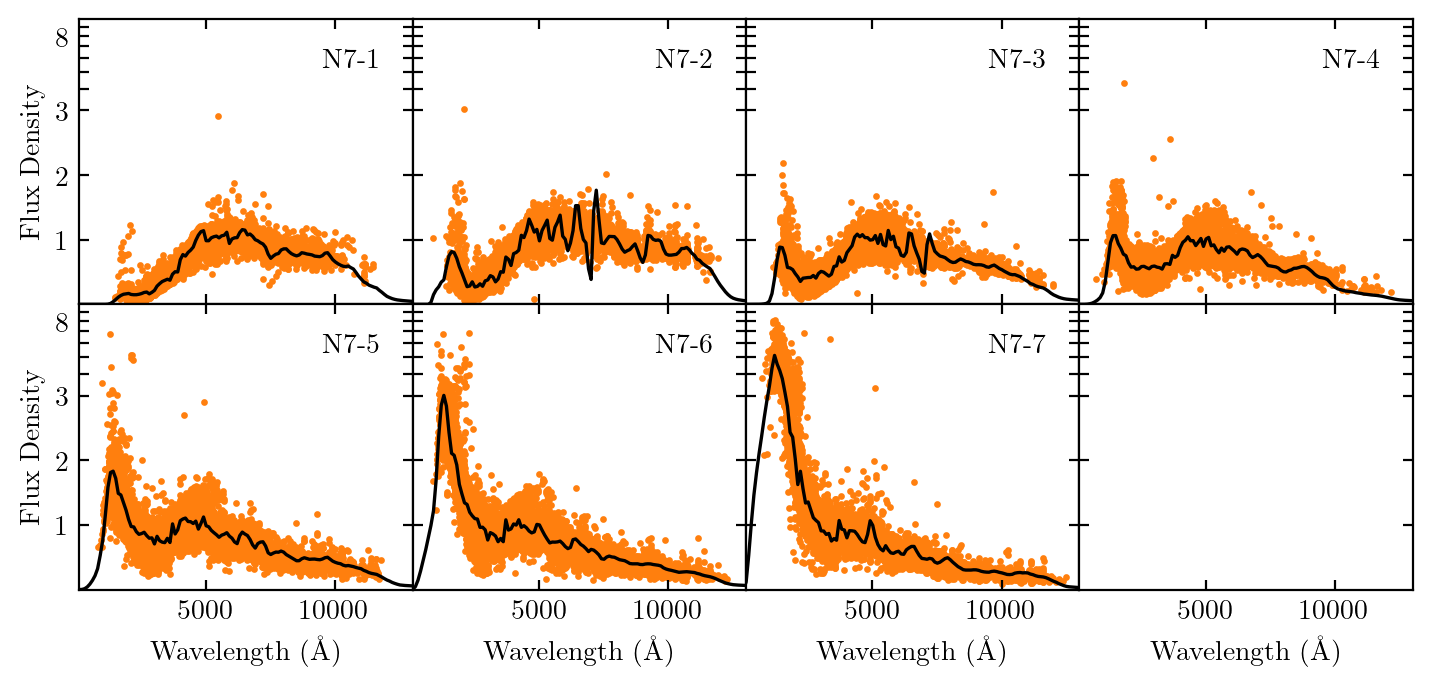

In [13]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 7:
        break
    
    wavelen = [row[0] for row in final_sets["N7_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N7_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N7_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N7-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [21]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N9

In [23]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 9
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [25]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.04, verbose=True)

Round 1
N9_1:   70.8   45.0   38.8   36.7   35.7  
N9_2:   98.1   67.9   63.4   61.6  
N9_3:   97.7   71.2   67.9   66.3  
N9_4:  115.7   77.1   74.9  
N9_5:  205.1  131.7  128.4  
N9_6:  343.8  219.8  211.4  
N9_7:  497.0  301.8  289.0  283.7  
N9_8:  857.4  502.2  480.8  474.8  
N9_9: 1562.3  937.0  914.4  
Round 2
N9_1:   34.3   31.7   31.2  
N9_2:   55.9   49.5   48.7  
N9_3:   47.7   42.0   41.4  
N9_4:   52.8   48.1   47.9  
N9_5:   70.9   65.3   64.8  
N9_6:   90.6   79.7   78.4  
N9_7:  138.0  117.6  116.0  
N9_8:  303.9  277.7  274.1  
N9_9:  896.1  
Round 3
N9_1:   32.1  
N9_2:   50.5  
N9_3:   46.0   41.7   41.3  
N9_4:   42.1   38.6   38.4  
N9_5:   51.0   47.7   47.5  
N9_6:   70.1   65.6   65.1  
N9_7:   86.6   82.0   81.2  
N9_8:  273.0  
N9_9:  837.4  750.0  735.6  
Round 4
N9_1:   31.8  
N9_2:   52.0  
N9_3:   49.8   45.7   45.4  
N9_4:   48.9   44.8   44.6  
N9_5:   49.1  
N9_6:   57.8   55.7  
N9_7:   85.5   83.0  
N9_8:  380.9  374.9  
N9_9:  589.7  541.3  533.4  
R

Number of fluxes in each training set:
[30671, 26589, 35432, 42241, 56122, 80401, 62059, 58951, 19262]


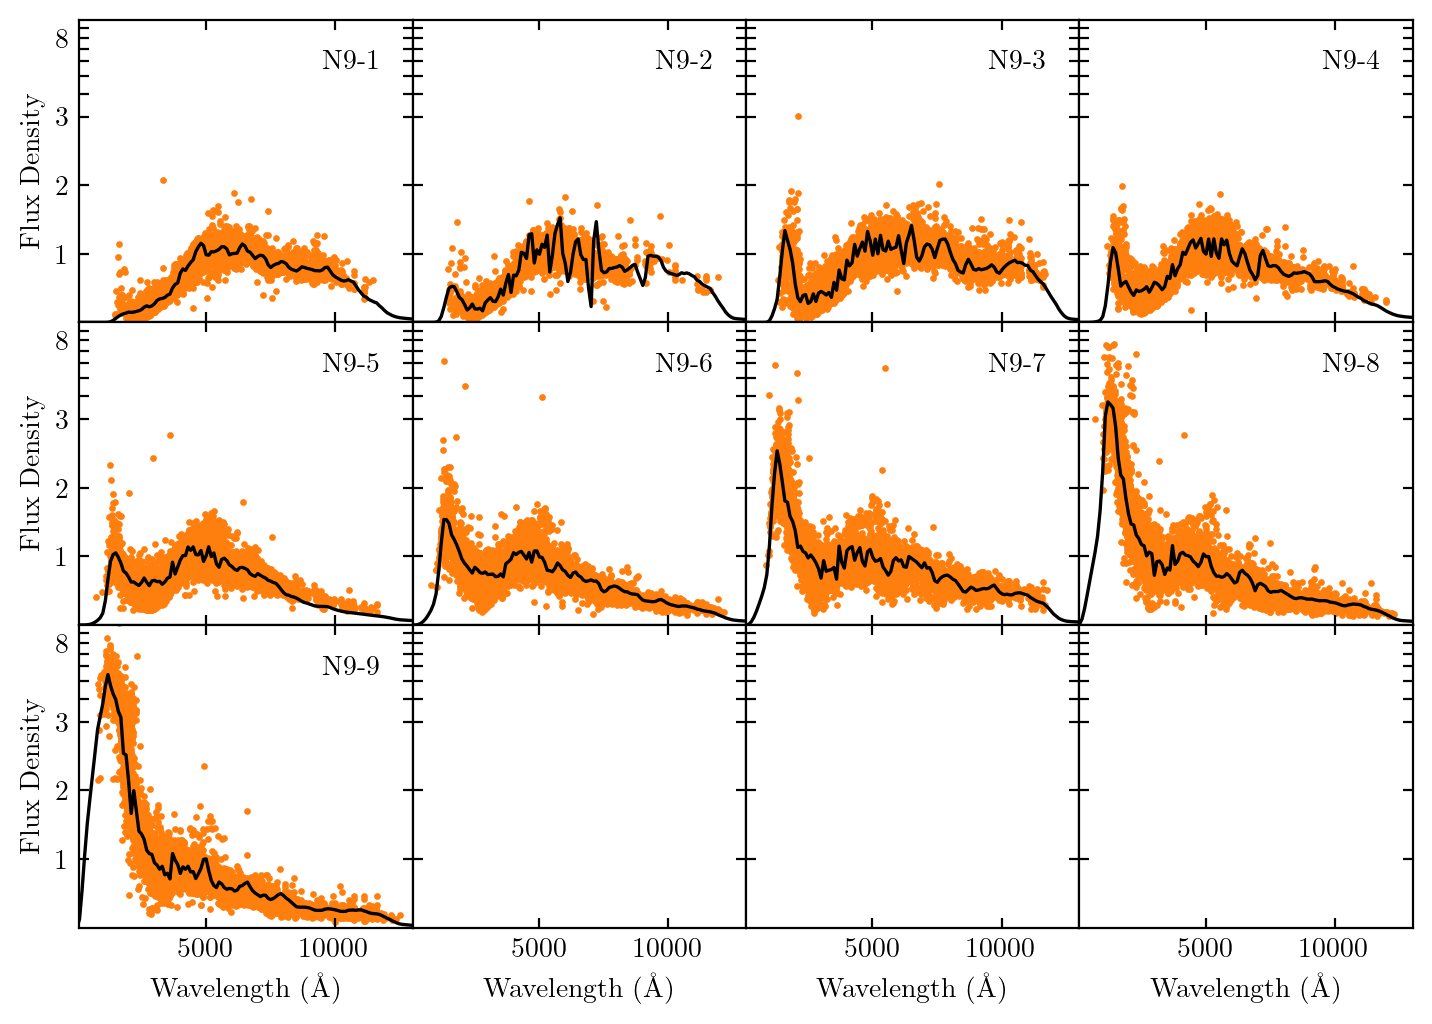

In [27]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 9:
        break
    
    wavelen = [row[0] for row in final_sets["N9_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N9_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N9_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N9-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [28]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N10

In [29]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 10
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [30]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.04, verbose=True)

Round 1
N10_1:   71.8   44.5   38.2   36.0   35.1  
N10_2:  100.4   69.3   64.7   62.9  
N10_3:   89.7   65.5   62.2   60.6  
N10_4:   95.1   64.7   62.2  
N10_5:  131.9   83.7   81.9  
N10_6:  298.4  194.6  189.0  
N10_7:  380.7  237.1  229.1  
N10_8:  480.5  278.1  262.5  255.6  
N10_9:  980.4  584.0  563.4  
N10_10: 1563.1  938.5  915.9  
Round 2
N10_1:   34.4  
N10_2:   52.4   47.2   46.4  
N10_3:   49.4   43.9   43.3  
N10_4:   44.6   40.5   40.1  
N10_5:   43.3   39.5   39.4  
N10_6:   85.7   77.4   76.4  
N10_7:  109.7   95.7   94.0  
N10_8:  164.1  144.1  142.7  
N10_9:  287.5  262.5  258.8  
N10_10:  922.4  
Round 3
N10_1:   34.1  
N10_2:   54.0   49.2   48.6  
N10_3:   48.1   43.3   42.8  
N10_4:   50.5   45.8   45.6  
N10_5:   35.2   33.5   33.4  
N10_6:   86.3   79.4   78.8  
N10_7:   73.5   68.4   67.7  
N10_8:  127.2  121.4  120.5  
N10_9:  257.4  
N10_10:  888.5  
Round 4
N10_1:   34.2  
N10_2:   51.6   47.8   47.4  
N10_3:   52.6   47.1   46.7  
N10_4:   46.0  
N10_5:  

Number of fluxes in each training set:
[42096, 41177, 38931, 39502, 41917, 25681, 69305, 46302, 47223, 19594]


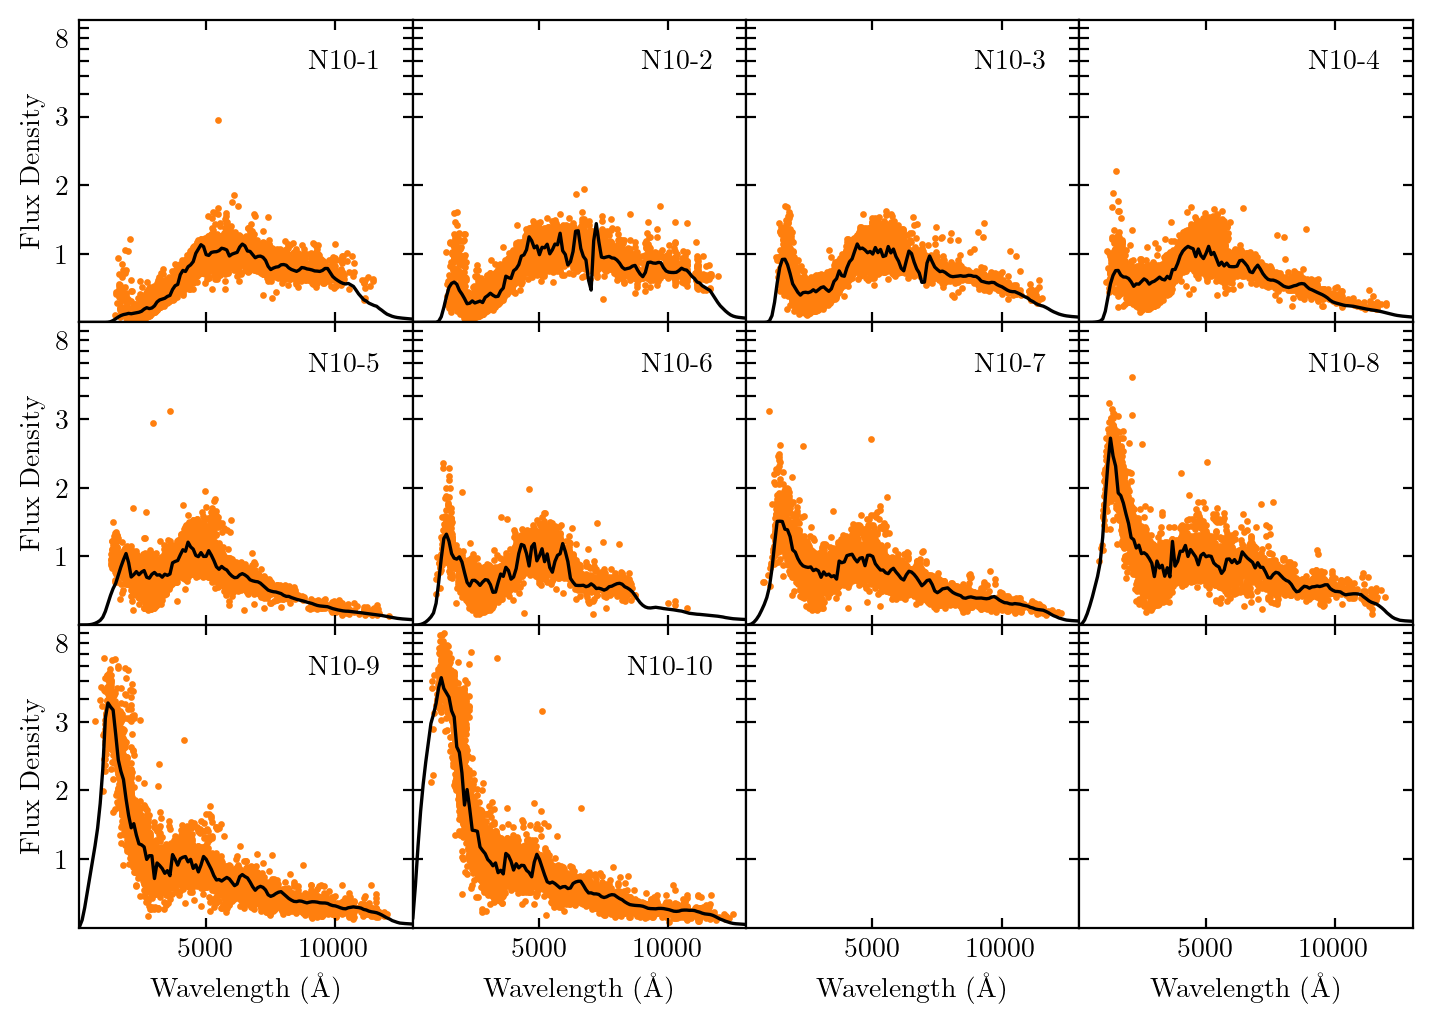

In [31]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 10:
        break
    
    wavelen = [row[0] for row in final_sets["N10_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N10_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N10_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N10-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [32]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N11

In [33]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 11
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [34]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.04, verbose=True)

Round 1
N11_1:   72.6   44.2   37.8   35.5   34.6  
N11_2:   97.2   66.1   61.4   59.7  
N11_3:   90.7   66.5   63.1   61.4  
N11_4:   96.5   68.5   65.9  
N11_5:  118.5   77.2   75.3  
N11_6:  198.7  127.7  125.3  
N11_7:  360.5  253.3  246.0  
N11_8:  343.2  203.7  195.2  191.7  
N11_9:  535.4  305.3  288.4  281.7  
N11_10: 1001.0  581.2  559.2  
N11_11: 1568.0  945.6  923.2  
Round 2
N11_1:   33.6  
N11_2:   54.4   48.4   47.4  
N11_3:   47.4   42.1   41.5  
N11_4:   41.2   37.4   36.9  
N11_5:   42.3   38.8   38.6  
N11_6:   54.8   50.1   49.8  
N11_7:   70.1   64.3   63.7  
N11_8:  125.6  104.1  102.1  
N11_9:  174.7  153.5  151.7  
N11_10:  317.2  288.8  284.5  
N11_11:  939.0  
Round 3
N11_1:   33.5  
N11_2:   51.7   47.2   46.6  
N11_3:   48.3   43.7   43.2  
N11_4:   42.2   38.7   38.4  
N11_5:   51.6   47.7   47.6  
N11_6:   69.0   65.3   65.1  
N11_7:   47.2   44.5   44.3  
N11_8:   79.6   72.4   71.6  
N11_9:  128.4  124.5  
N11_10:  267.1  248.0  244.2  
N11_11:  929.9  
R

Number of fluxes in each training set:
[36009, 29200, 24944, 26859, 47872, 31180, 70956, 36423, 58561, 35156, 14568]


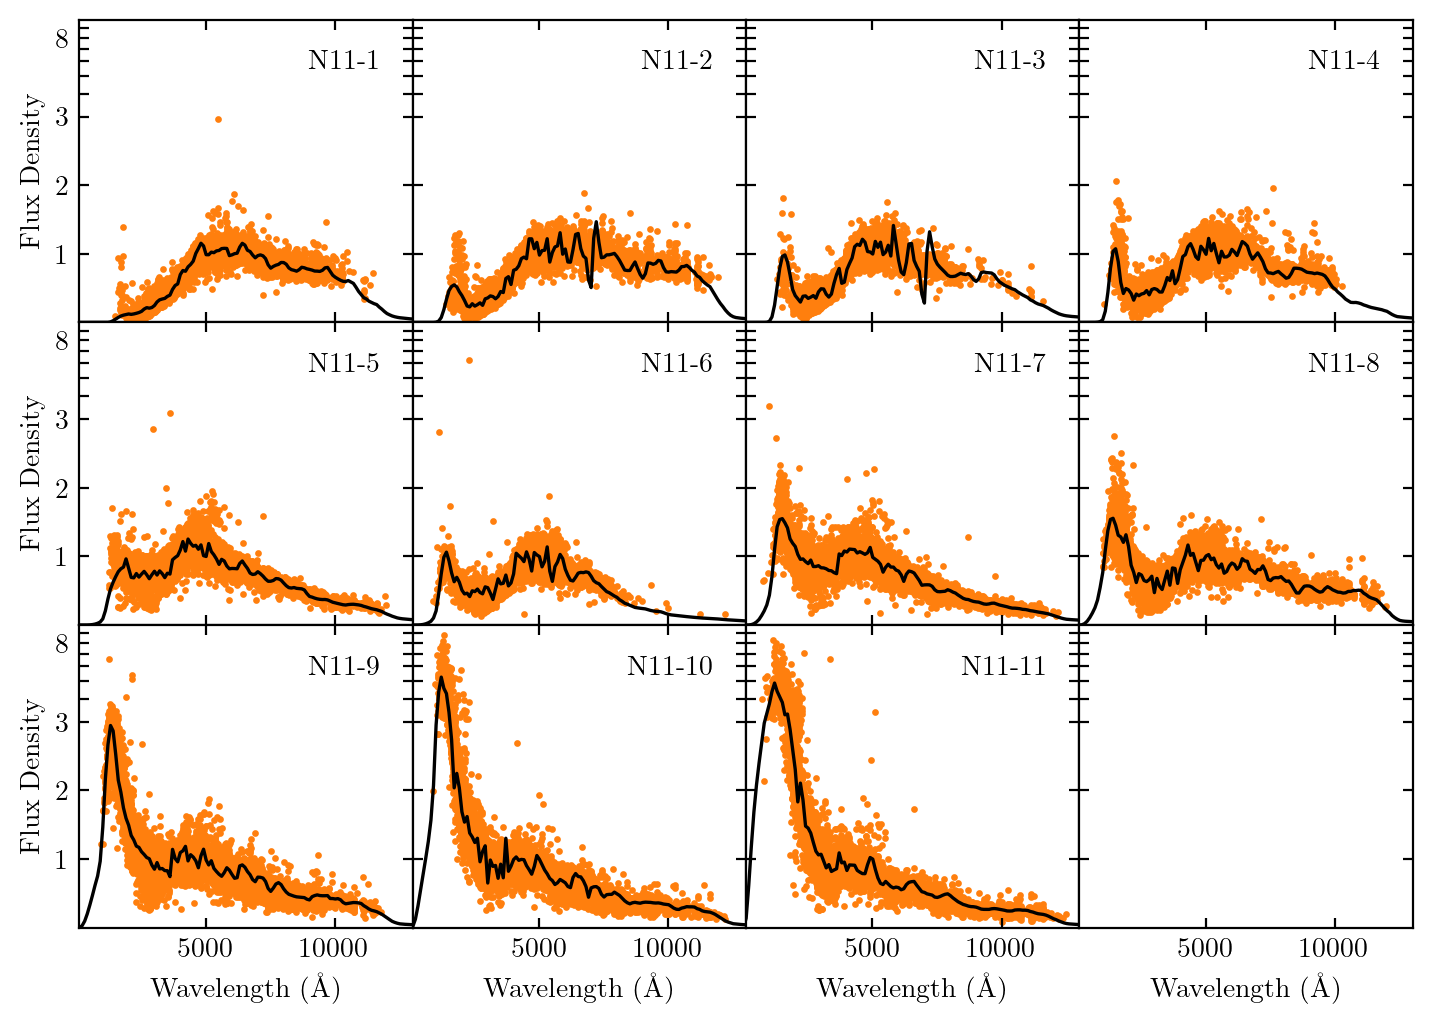

In [35]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [36]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N12

In [37]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 12
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [38]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.05, verbose=True)

Round 1
N12_1:   73.3   44.0   37.4   35.1   34.1  
N12_2:  101.9   68.5   63.7   61.9  
N12_3:   84.5   62.5   59.3   57.7  
N12_4:   89.2   64.1   61.4  
N12_5:  104.1   69.2   67.3  
N12_6:  142.0   90.3   88.5  
N12_7:  222.8  143.3  139.9  
N12_8:  270.9  163.2  156.8  
N12_9:  377.0  218.4  208.0  
N12_10:  588.7  332.4  315.0  308.7  
N12_11: 1040.2  621.3  601.1  
N12_12: 1600.0  969.5  946.0  
Round 2
N12_1:   33.7  
N12_2:   49.2   44.3   43.5  
N12_3:   48.9   43.3   42.5  
N12_4:   42.7   38.6   38.0  
N12_5:   44.5   41.1   40.8  
N12_6:   51.1   47.7   47.4  
N12_7:   51.5   46.9   46.5  
N12_8:   77.0   68.3   67.4  
N12_9:  121.8   98.1   96.0  
N12_10:  203.0  181.6  179.5  
N12_11:  302.6  274.4  269.9  
N12_12:  965.7  
Round 3
N12_1:   33.8  
N12_2:   50.4   45.9   45.3  
N12_3:   47.1   42.6   42.1  
N12_4:   43.6   40.3   39.9  
N12_5:   35.2   33.0   32.8  
N12_6:   49.7  
N12_7:   47.9  
N12_8:   71.5   67.4   66.9  
N12_9:   82.7   74.6   73.6  
N12_10:  119.6 

Number of fluxes in each training set:
[36524, 24195, 24255, 32353, 32396, 36659, 51048, 47700, 28966, 47825, 33436, 16371]


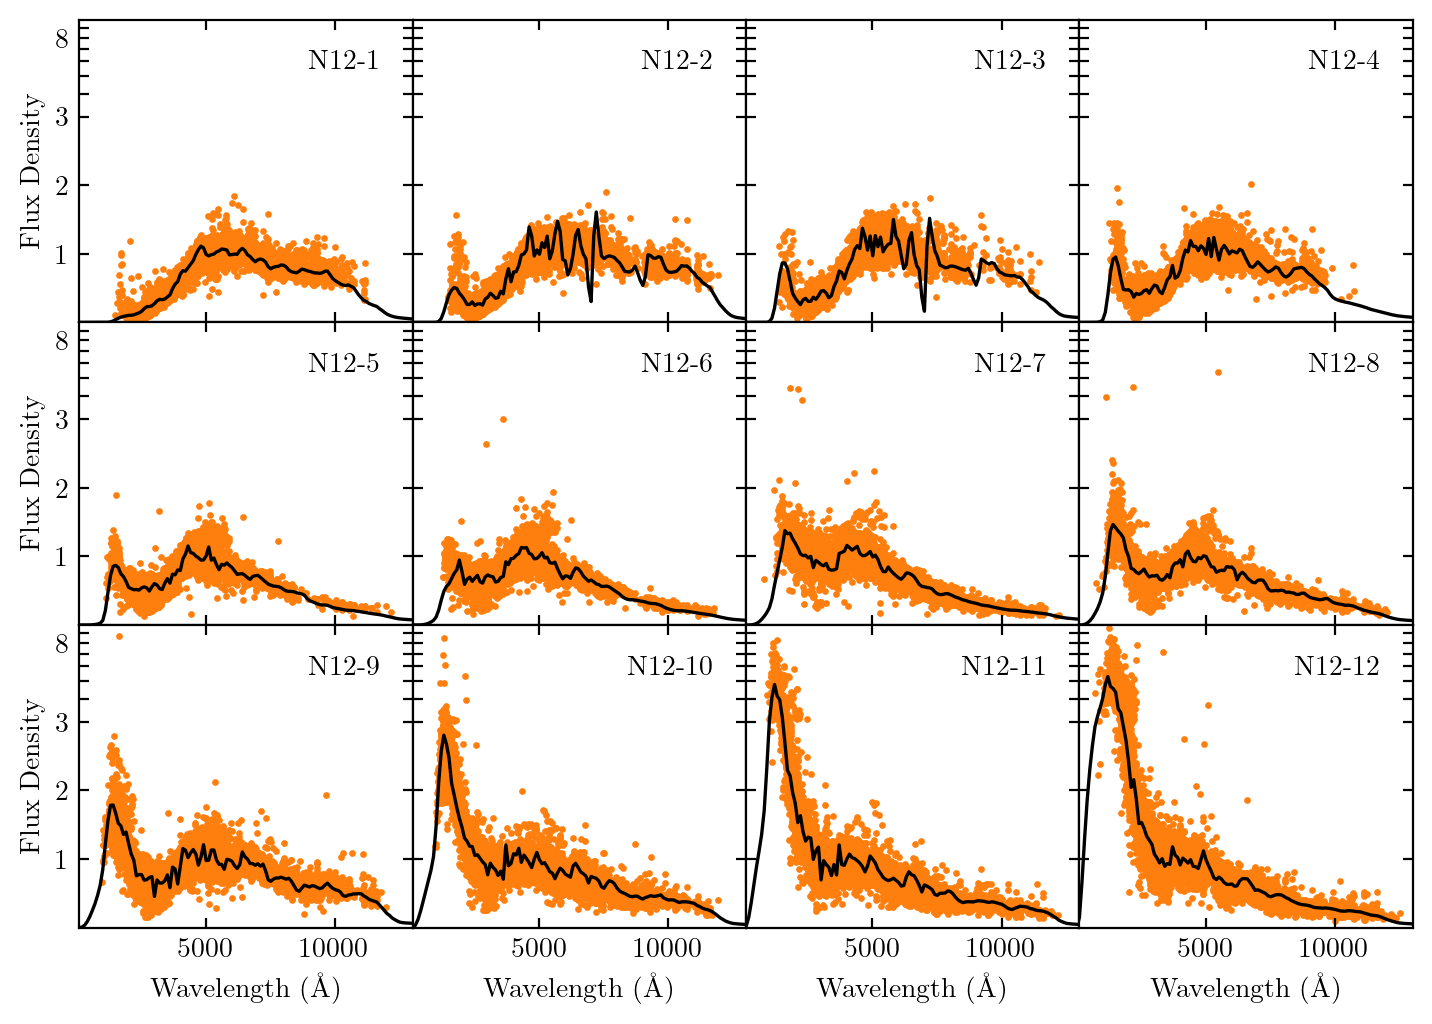

In [39]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [40]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N13

In [41]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 13
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [42]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.05, verbose=True)

Round 1
N13_1:   74.0   43.9   37.2   34.9   33.9  
N13_2:  101.7   67.8   62.9   61.1  
N13_3:   86.1   64.3   60.9   59.2  
N13_4:   88.1   64.3   61.6  
N13_5:   93.1   63.3   61.1  
N13_6:  118.1   75.5   73.8  
N13_7:  168.5  105.7  103.2  
N13_8:  241.0  150.6  145.8  
N13_9:  333.2  201.7  194.8  
N13_10:  360.6  198.3  188.3  184.1  
N13_11:  616.9  354.7  339.2  
N13_12: 1088.9  652.8  630.7  
N13_13: 1585.1  948.9  925.8  
Round 2
N13_1:   33.3  
N13_2:   50.9   45.6   44.7  
N13_3:   46.6   41.3   40.6  
N13_4:   40.8   37.0   36.2  
N13_5:   43.6   40.2   39.8  
N13_6:   36.7   33.9   33.7  
N13_7:   58.4   53.4   53.1  
N13_8:   53.0   48.8   48.3  
N13_9:   86.5   71.9   70.0  
N13_10:  128.6  103.9  102.0  
N13_11:  206.2  182.5  179.4  
N13_12:  296.8  269.4  265.9  
N13_13:  986.9  863.7  849.6  
Round 3
N13_1:   33.6  
N13_2:   48.1   44.2   43.7  
N13_3:   45.4   41.5   41.1  
N13_4:   42.8   39.5   39.0  
N13_5:   34.2   32.0   31.8  
N13_6:   39.1   36.7   36.6  
N

Number of fluxes in each training set:
[25641, 23685, 26150, 28471, 25872, 47468, 26282, 50158, 36889, 34918, 40950, 29485, 15759]


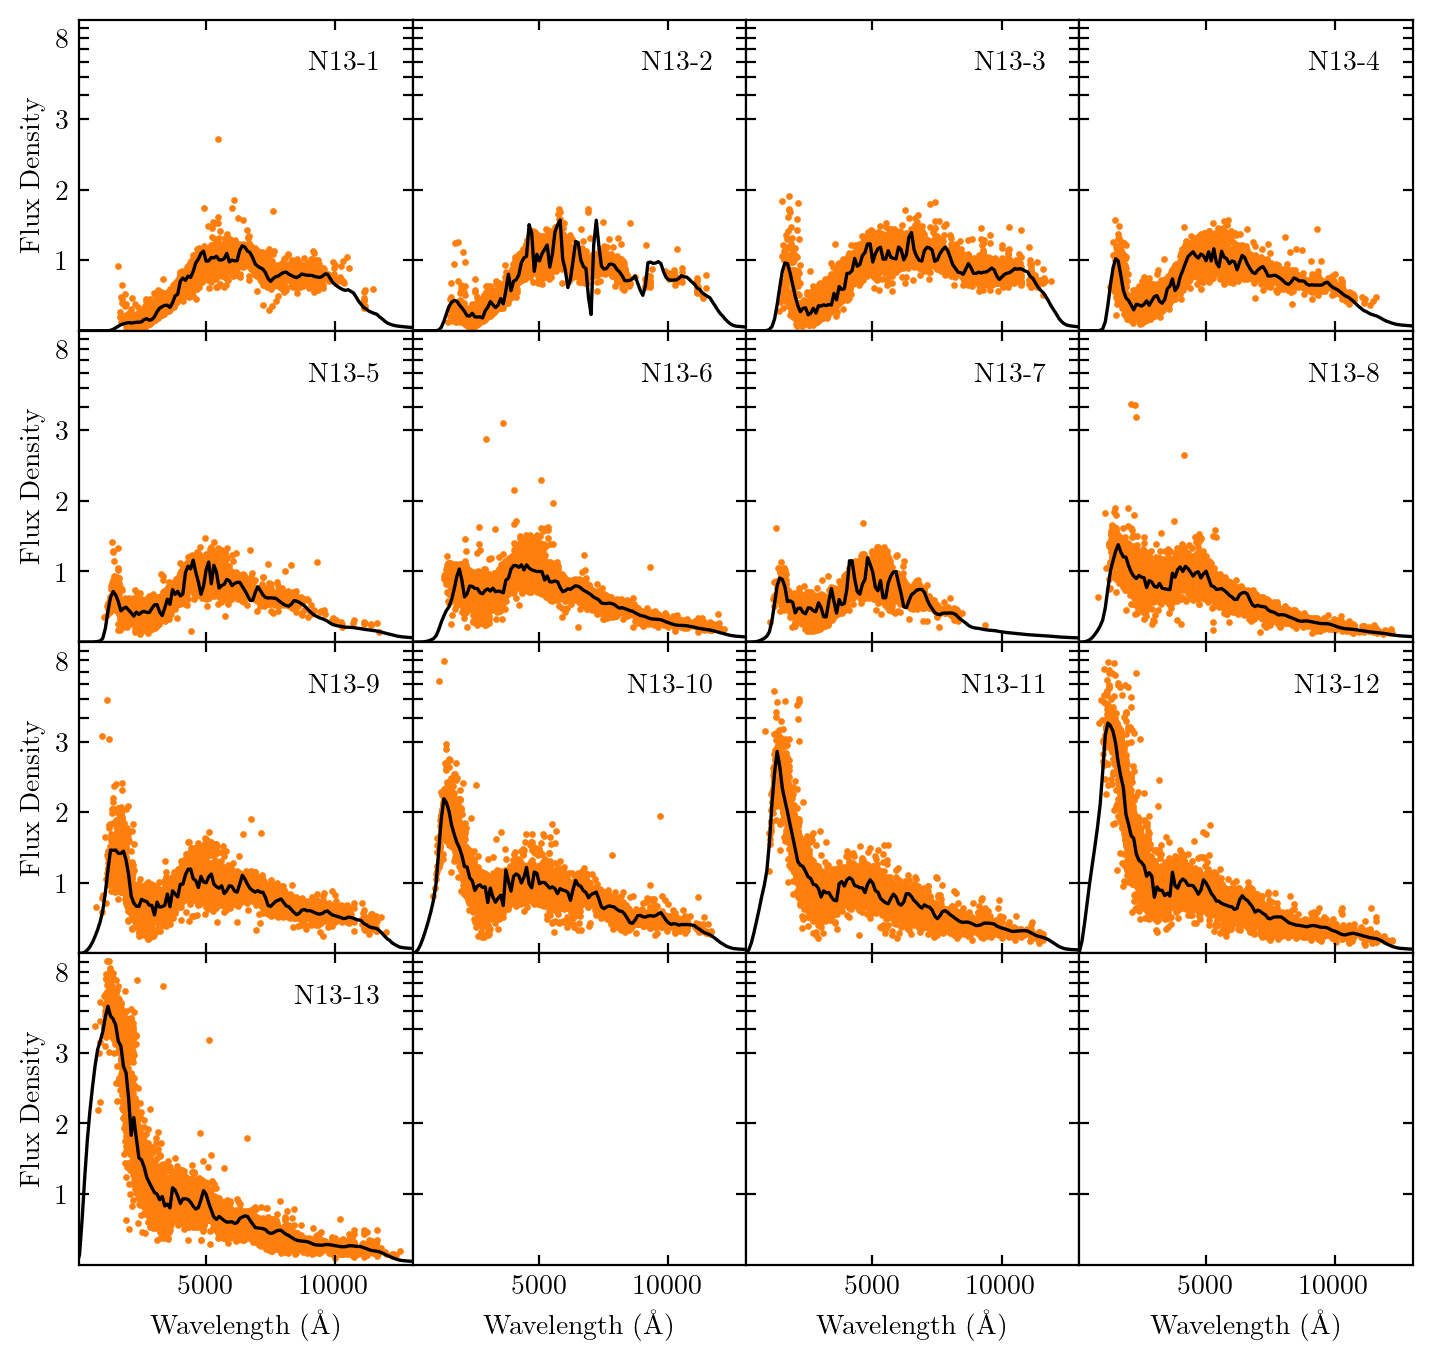

In [43]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [44]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N14

In [5]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 14
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [6]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.06, verbose=True)

Round 1
N14_1:   74.2   43.1   36.4   34.1   33.1  
N14_2:  103.7   68.9   63.8   62.0  
N14_3:   85.2   63.9   60.6  
N14_4:   91.9   67.6   64.6  
N14_5:   85.2   58.7   56.6  
N14_6:  100.0   64.0   62.4  
N14_7:  122.8   74.3   72.5  
N14_8:  191.5  121.1  118.4  
N14_9:  187.2  106.5  103.1  
N14_10:  335.4  200.2  192.6  
N14_11:  416.6  228.2  215.0  
N14_12:  663.8  378.7  361.0  
N14_13: 1109.7  673.0  651.6  
N14_14: 1584.1  949.3  926.0  
Round 2
N14_1:   33.5  
N14_2:   48.9   44.5   43.6  
N14_3:   47.8   42.5   41.6  
N14_4:   42.9   38.6   37.7  
N14_5:   35.5   32.4   31.9  
N14_6:   35.6   33.3   33.1  
N14_7:   31.5   29.0   28.8  
N14_8:   49.2   44.8   44.1  
N14_9:   54.7   49.6   48.8  
N14_10:   92.1   73.7   72.0  
N14_11:  150.7  119.5  117.2  
N14_12:  232.6  207.3  204.2  
N14_13:  347.9  314.0  309.5  
N14_14:  972.0  
Round 3
N14_1:   34.1  
N14_2:   47.8   43.8   43.3  
N14_3:   45.8   41.5   41.1  
N14_4:   41.5   38.4   37.9  
N14_5:   35.0   32.6   32.2

Number of fluxes in each training set:
[30543, 22505, 27530, 31135, 23802, 27091, 43728, 37696, 43274, 27990, 22066, 34484, 26295, 13589]


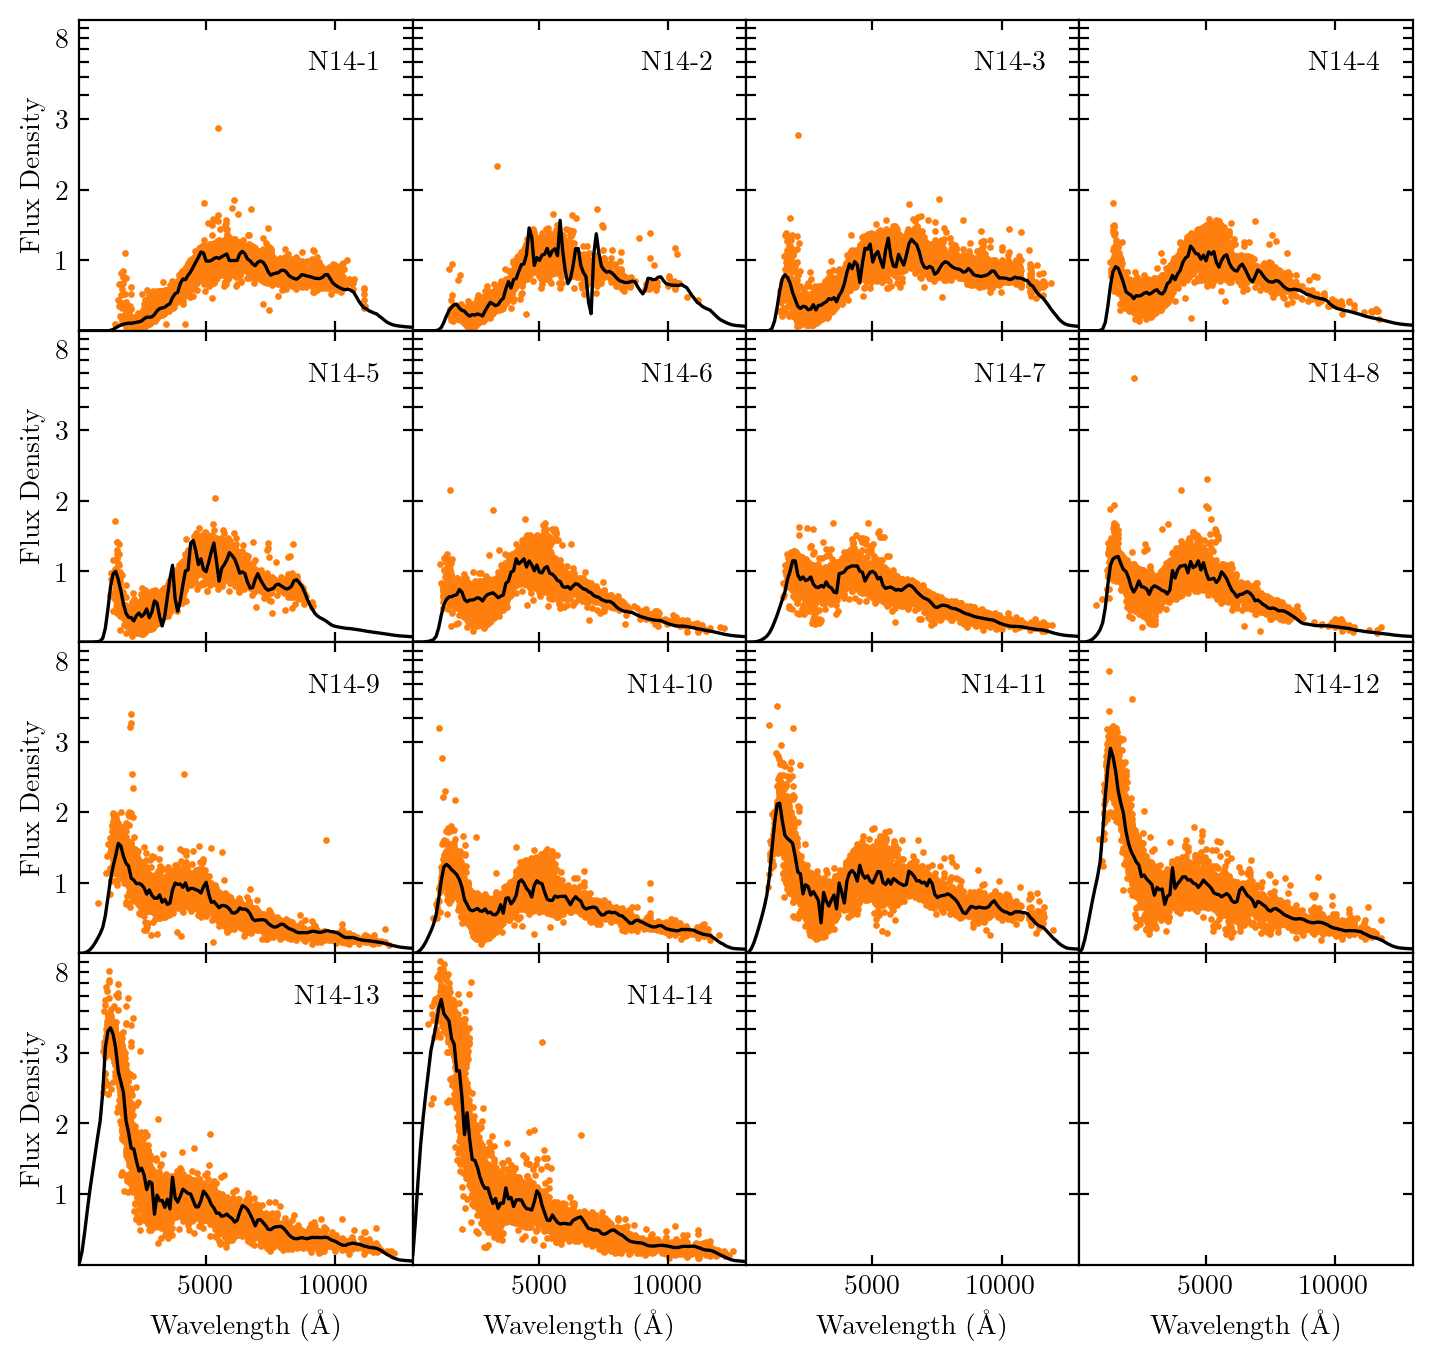

In [7]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [8]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N18

In [9]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 18
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [10]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.1, verbose=True)

Round 1
N18_1:   77.1   43.8   36.8   34.4  
N18_2:   97.7   61.9   55.9  
N18_3:   99.5   68.9   65.2  
N18_4:   84.6   63.9   60.7  
N18_5:   76.5   55.1   52.3  
N18_6:   71.8   48.7   46.7  
N18_7:   74.1   46.1   44.4  
N18_8:  100.6   61.3   59.7  
N18_9:  120.9   73.1   71.5  
N18_10:  176.0  113.2  110.8  
N18_11:  207.2  123.9  119.9  
N18_12:  199.5  115.6  111.9  
N18_13:  282.7  150.9  143.9  
N18_14:  328.8  169.7  158.9  
N18_15:  616.6  352.4  333.6  
N18_16:  792.9  432.4  416.0  
N18_17: 1211.1  750.5  730.1  
N18_18: 1606.0  956.7  932.2  
Round 2
N18_1:   34.9  
N18_2:   46.9   41.8   40.6  
N18_3:   43.3   39.2  
N18_4:   42.1   37.7   36.8  
N18_5:   41.4   37.4  
N18_6:   30.8   28.5  
N18_7:   30.7   28.5  
N18_8:   30.5   28.3  
N18_9:   23.3   21.4  
N18_10:   41.6   37.6  
N18_11:   43.5   40.2  
N18_12:   54.9   48.0   46.9  
N18_13:  113.8   84.4   82.3  
N18_14:  118.5   87.0   84.8  
N18_15:  216.5  185.7  183.1  
N18_16:  215.4  194.8  
N18_17:  415.3  35

Number of fluxes in each training set:
[40807, 36029, 31603, 34789, 27336, 18181, 17042, 20075, 20045, 14372, 22433, 14099, 22832, 22058, 18316, 21411, 17524, 12776]


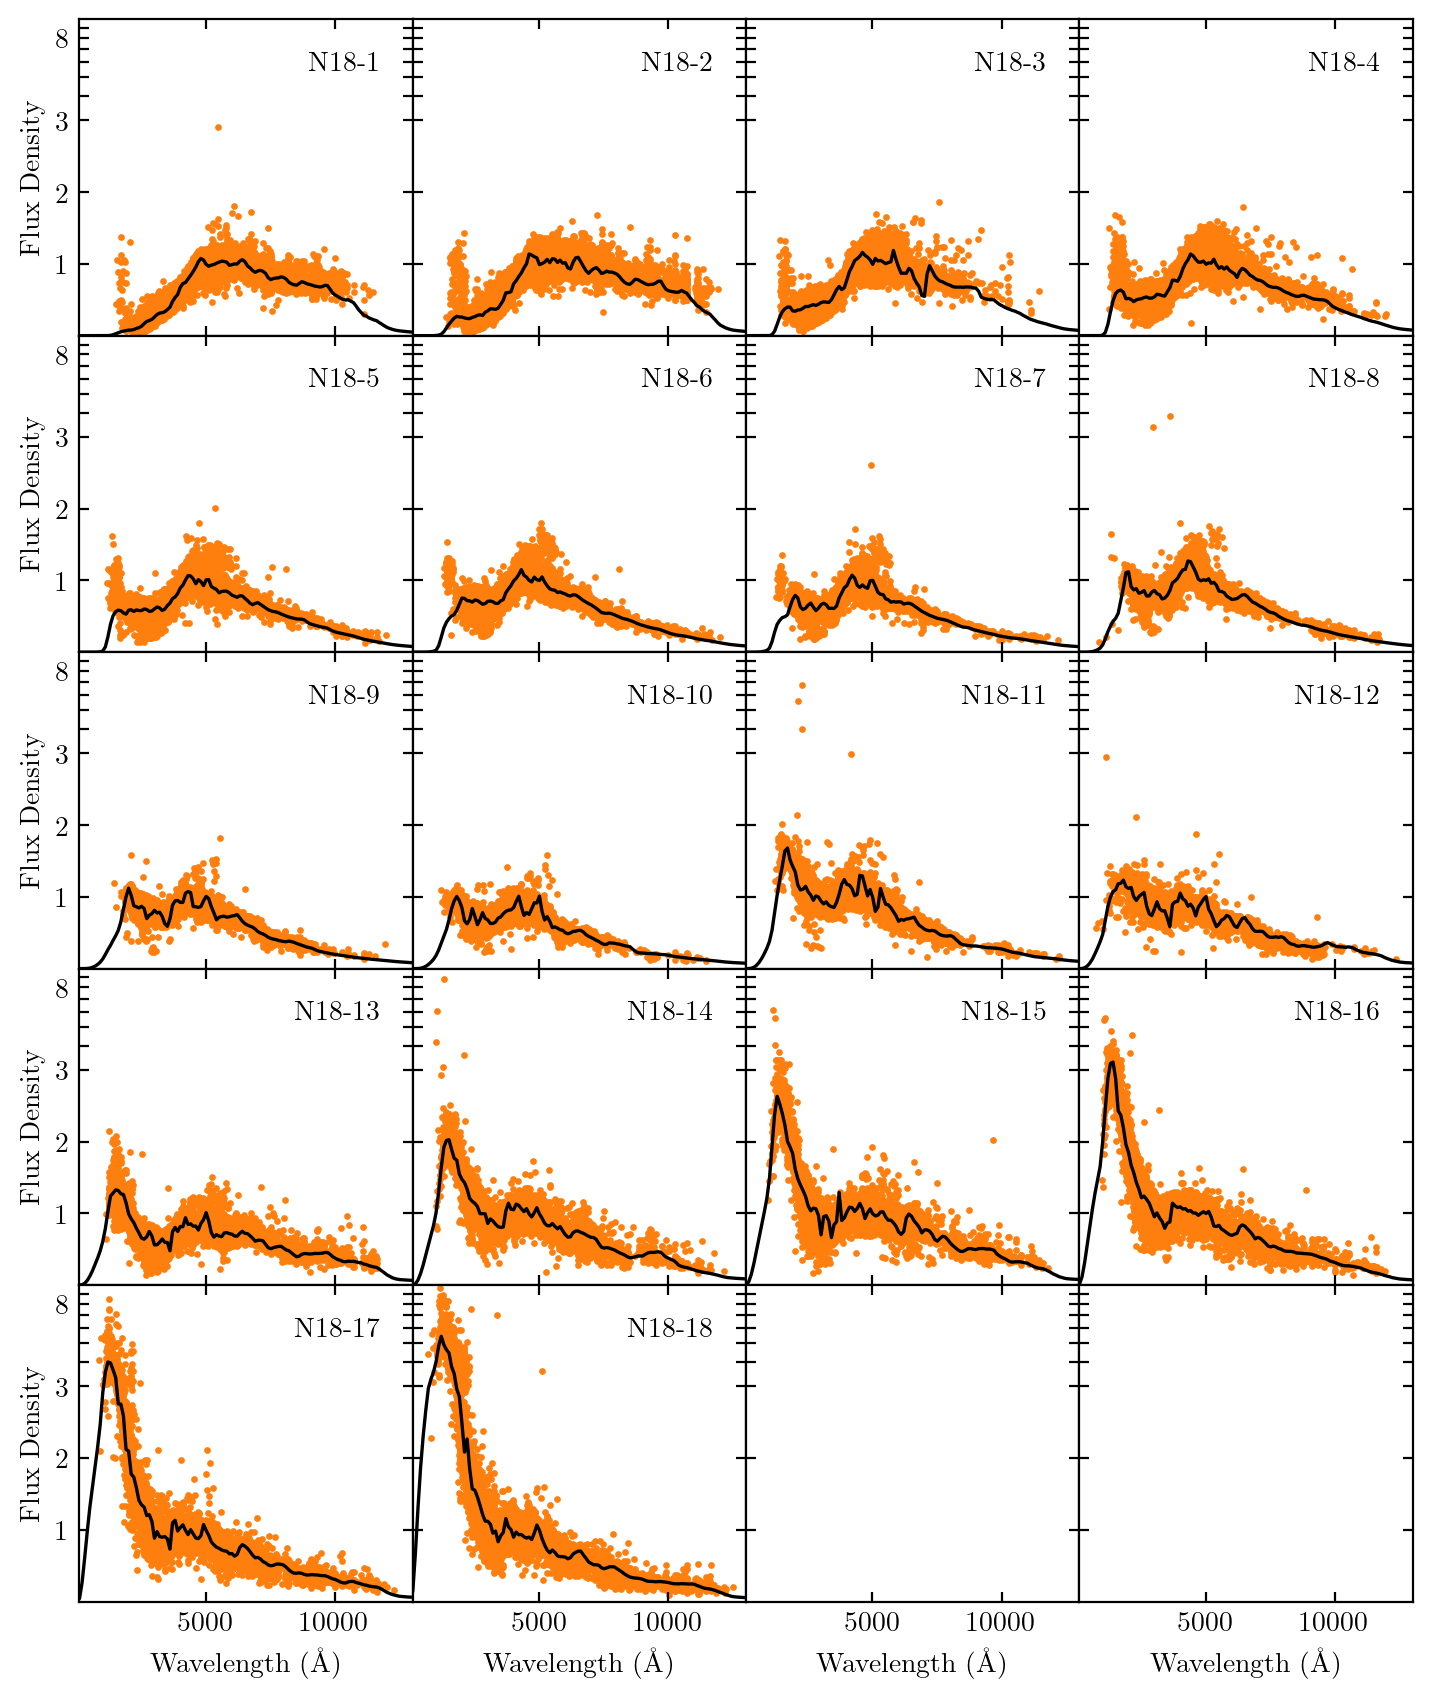

In [11]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [12]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N20

In [10]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 20
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [11]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.1, verbose=True)

Round 1
N20_1:   78.3   43.7   36.5   34.1  
N20_2:   97.0   60.7   54.5   52.6  
N20_3:   99.7   68.3   64.5  
N20_4:   87.8   67.4   64.5  
N20_5:   78.4   57.5   54.5  
N20_6:   68.4   47.7   45.3  
N20_7:   76.9   51.4   49.2  
N20_8:   77.8   47.2   45.7  
N20_9:   97.6   57.3   55.9  
N20_10:   90.2   49.5   48.0  
N20_11:  142.0   85.5   83.4  
N20_12:  189.6  116.2  113.0  
N20_13:  187.8  106.5  102.5  
N20_14:  205.3  103.0   98.9  
N20_15:  326.7  178.0  168.9  
N20_16:  433.4  231.2  219.2  
N20_17:  630.1  349.8  333.4  
N20_18:  827.9  455.3  439.9  
N20_19: 1245.5  762.0  739.0  
N20_20: 1629.9  975.6  951.4  
Round 2
N20_1:   33.8  
N20_2:   46.5   41.7   40.9  
N20_3:   45.2   40.6   39.9  
N20_4:   44.5   39.6   38.7  
N20_5:   38.2   34.9  
N20_6:   34.3   31.3  
N20_7:   36.0   33.7  
N20_8:   28.0   26.3  
N20_9:   21.1   19.5  
N20_10:   32.4   29.6  
N20_11:   34.0   31.0  
N20_12:   37.3   33.1   32.7  
N20_13:   40.2   34.7   33.8  
N20_14:   79.7   65.3   63.5

Number of fluxes in each training set:
[39526, 26697, 20273, 20700, 15824, 19150, 23131, 13793, 24842, 22851, 14834, 27315, 19526, 18948, 23373, 14860, 20154, 16545, 15316, 14070]


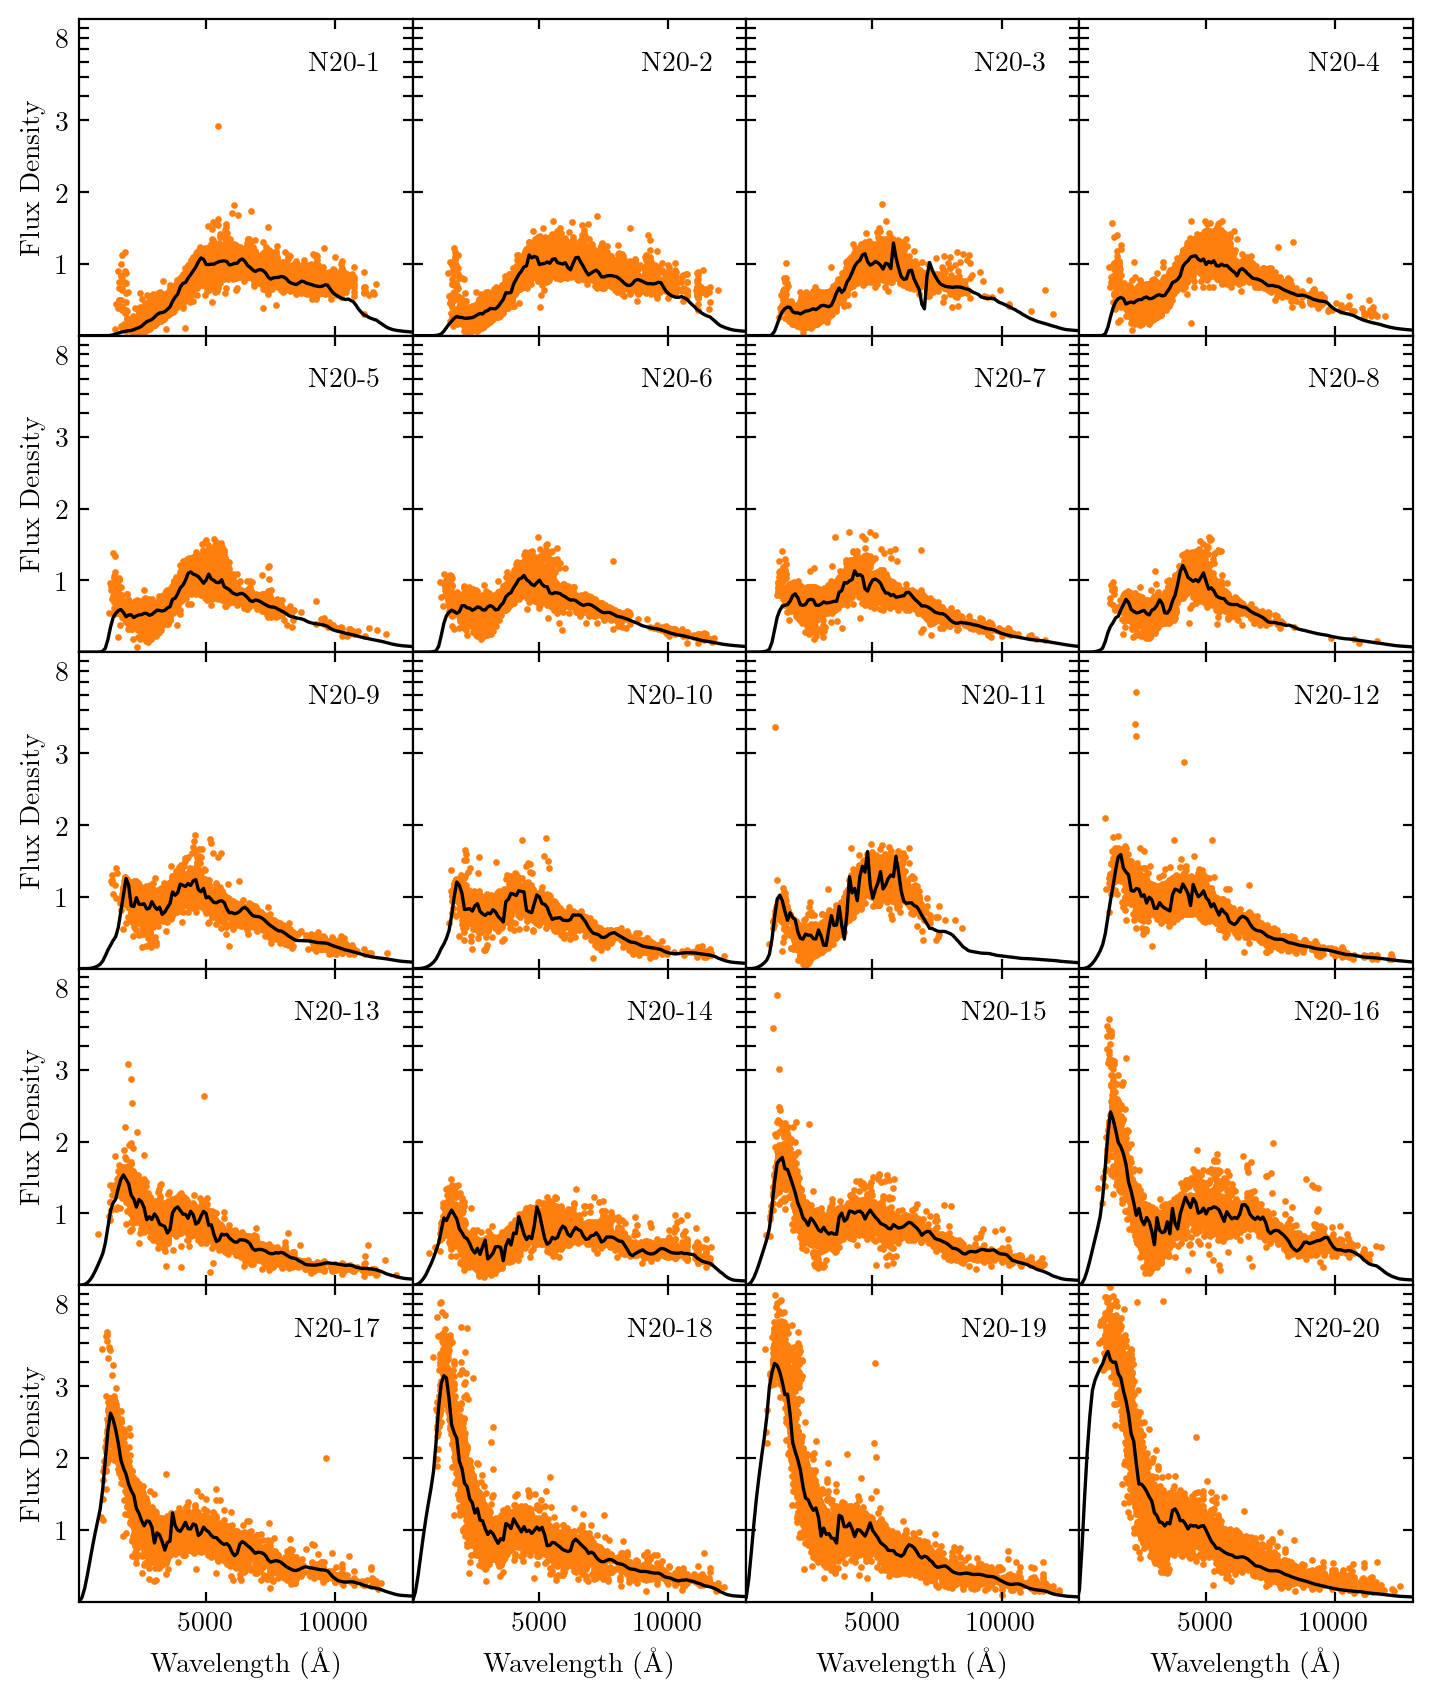

In [12]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [13]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N22

In [14]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 22
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [15]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.1, verbose=True)

Round 1
N22_1:   78.8   43.4   36.2   33.7  
N22_2:  100.4   61.2   54.8   52.9  
N22_3:   99.9   68.0   64.2  
N22_4:   83.1   64.0   61.2  
N22_5:   81.3   61.0   58.2  
N22_6:   67.7   47.4   44.7  
N22_7:   72.4   50.5   48.5  
N22_8:   79.9   52.2   50.2  
N22_9:   80.0   48.3   46.9  
N22_10:   77.1   39.9   38.6  
N22_11:   96.9   55.4   53.8  
N22_12:  112.3   65.6   63.8  
N22_13:  131.7   73.4   70.7  
N22_14:  155.0   85.1   81.8  
N22_15:  200.2  105.3  102.0  
N22_16:  276.4  145.7  137.6  
N22_17:  312.3  163.0  153.9  
N22_18:  485.5  257.3  244.5  
N22_19:  755.4  423.8  406.2  
N22_20:  930.5  534.3  514.6  
N22_21: 1263.2  762.7  743.1  
N22_22: 1627.8  971.2  946.5  
Round 2
N22_1:   33.9  
N22_2:   44.0   40.1  
N22_3:   50.6   45.4   44.7  
N22_4:   41.8   37.6   36.9  
N22_5:   38.4   34.9  
N22_6:   36.1   32.5  
N22_7:   29.2   27.2  
N22_8:   21.7   20.0  
N22_9:   26.3   25.0  
N22_10:   14.7   13.1   12.9  
N22_11:   17.3   15.4   15.2  
N22_12:   27.5   25.1

Number of fluxes in each training set:
[35451, 28839, 18221, 21519, 20078, 19502, 21573, 20189, 16289, 16727, 18617, 13787, 15238, 10581, 16839, 20346, 19923, 12815, 19574, 18337, 15409, 11874]


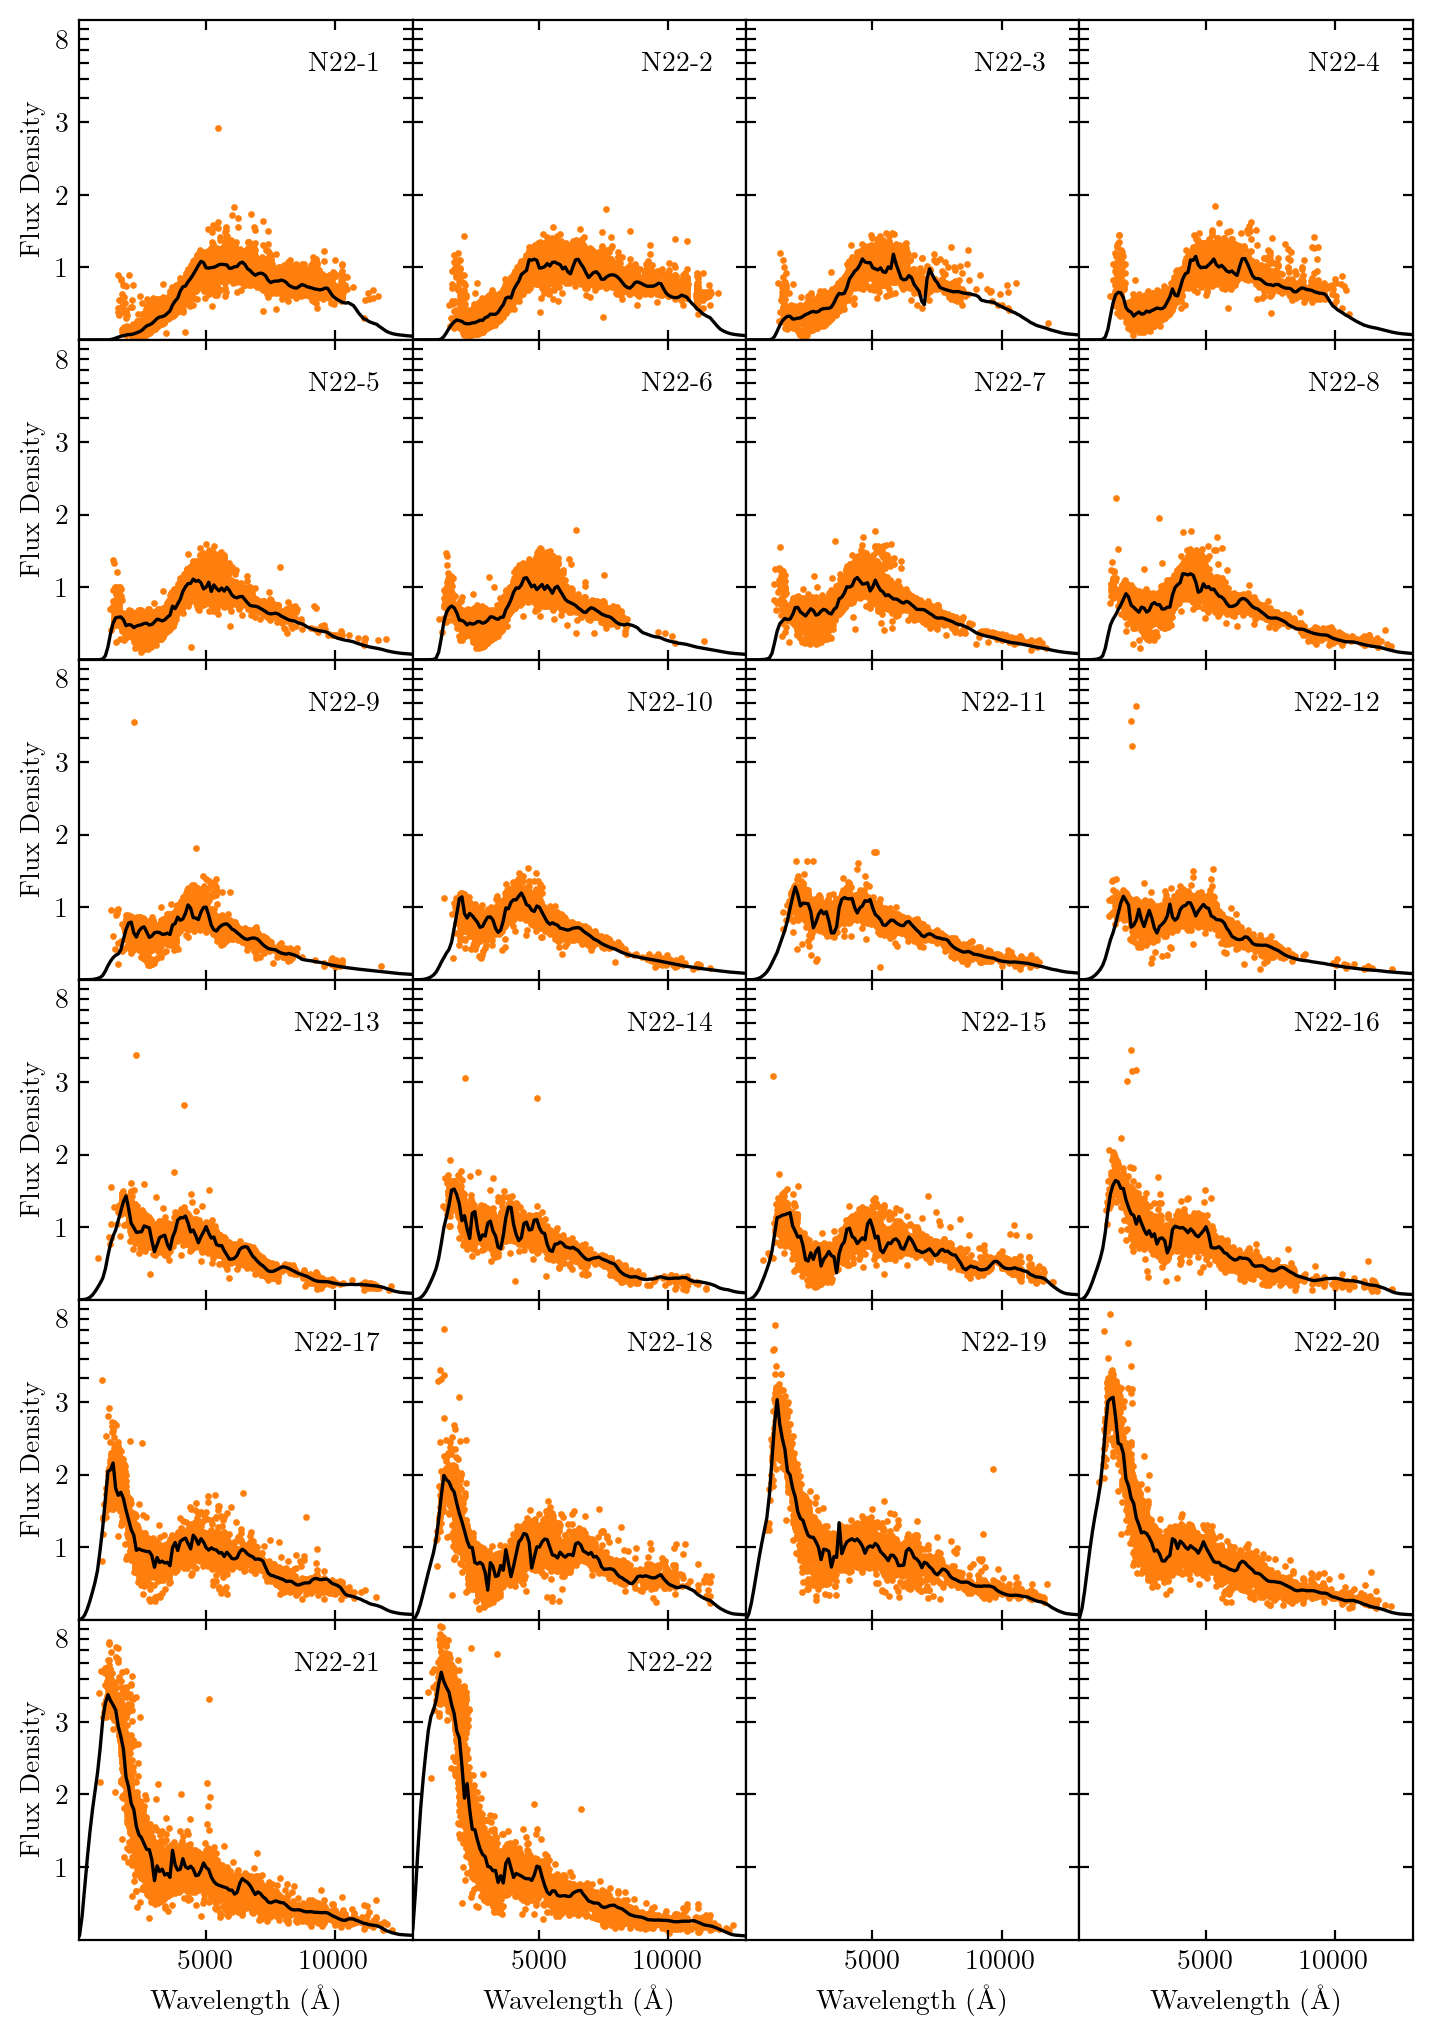

In [16]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [17]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N24

In [18]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 24
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [19]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.1, verbose=True)

Round 1
N24_1:   80.6   44.1   36.6   34.1  
N24_2:   97.2   57.9   51.7   49.8  
N24_3:   94.5   68.5   64.4  
N24_4:   92.8   62.9   59.6  
N24_5:   85.4   65.4   62.4  
N24_6:   74.4   54.9   52.1  
N24_7:   67.7   47.4   45.0  
N24_8:   61.4   39.1   37.1  
N24_9:   66.4   40.0   38.5  
N24_10:   78.9   45.9   44.5  
N24_11:   76.6   39.2   37.9  
N24_12:   93.5   51.6   50.1  
N24_13:  104.2   58.5   56.8  
N24_14:  145.0   83.4   80.9  
N24_15:  158.7   92.0   89.8  
N24_16:  202.5  112.2  107.6  
N24_17:  217.8  106.4  101.3  
N24_18:  291.4  153.8  148.1  
N24_19:  375.5  191.8  180.3  
N24_20:  568.1  298.1  281.8  
N24_21:  734.1  409.3  397.2  
N24_22:  930.7  528.9  509.4  
N24_23: 1322.7  824.7  803.8  
N24_24: 1644.2  973.5  948.0  
Round 2
N24_1:   34.9  
N24_2:   42.0   37.9  
N24_3:   44.7   40.6  
N24_4:   48.5   43.7  
N24_5:   41.9   37.6   36.7  
N24_6:   31.3   28.1   27.2  
N24_7:   30.7   28.2  
N24_8:   24.6   22.7  
N24_9:   22.7   21.2  
N24_10:   15.2   14.3

Number of fluxes in each training set:
[30762, 19409, 15590, 14442, 24545, 18666, 16533, 15573, 17767, 14750, 19498, 17656, 16897, 14691, 13093, 23287, 12932, 20820, 15437, 17325, 13404, 13487, 13272, 11892]


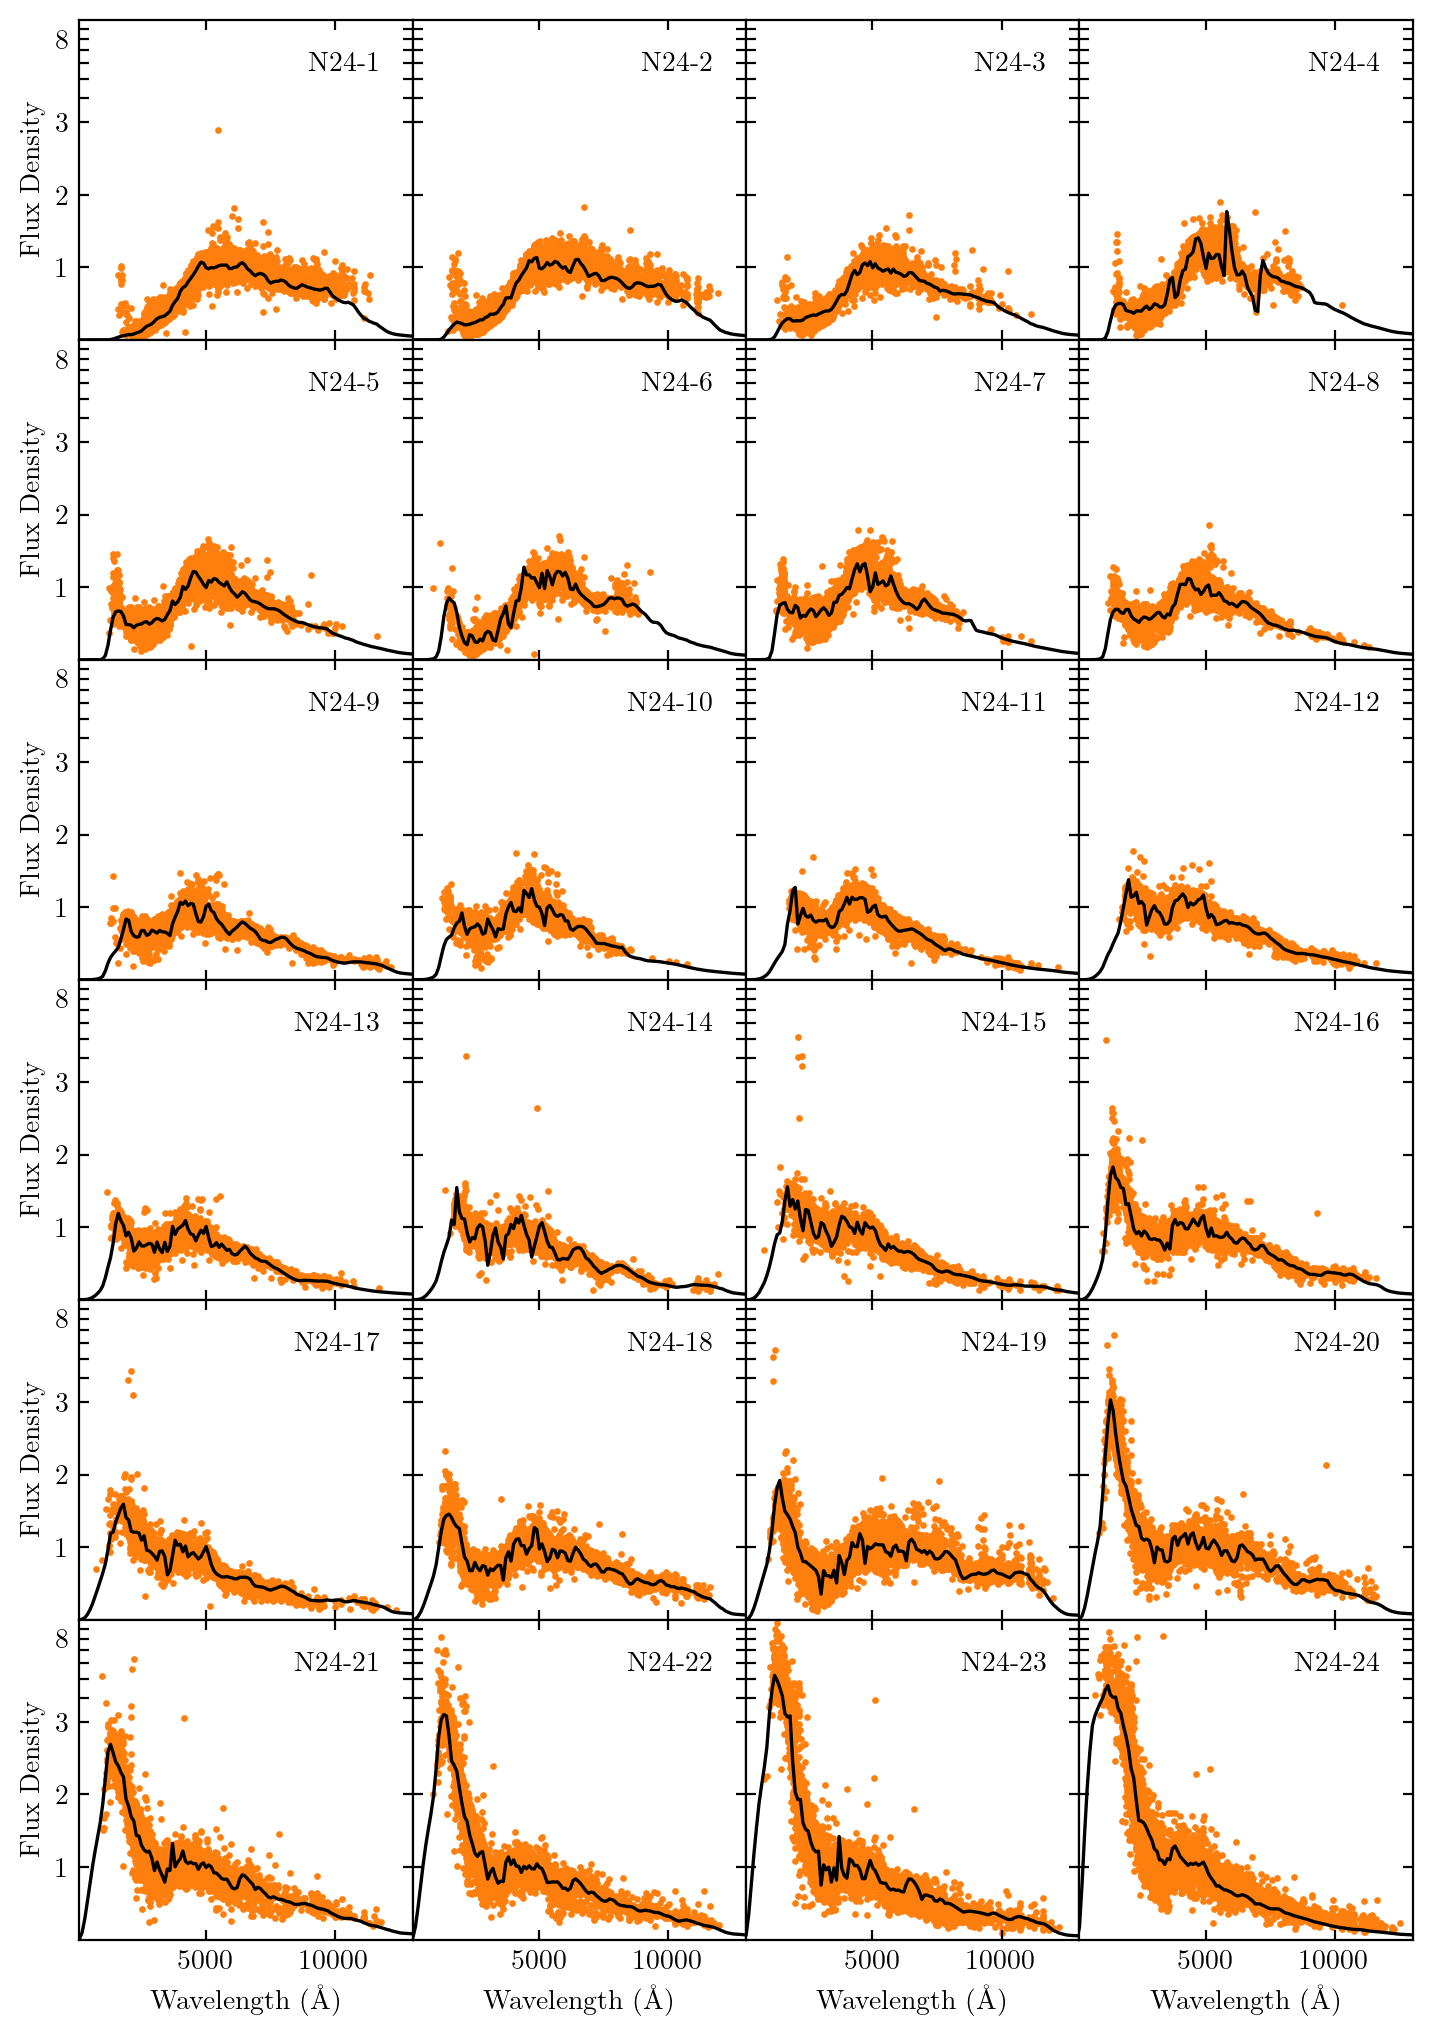

In [20]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == N:
        break
    
    wavelen = [row[0] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N"+str(N)+"_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N"+str(N)+"_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N"+str(N)+"-"+str(i+1),transform=ax.transAxes,ha="right",va="top")


for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [21]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = copy.copy(trained_templates[template].wavelen)
    y = copy.copy(trained_templates[template].flambda)
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()